## Support Vector Machine Regression


This dataset contains job postings from Glassdoor.com. We will use it to predict the salaries based on the given job characteristics.


- job_id:	The unique identifier for the job posting (Numeric)
- job_title_simple: The simplied version of the job title
- Job Description: The posted job description on GlassDoor
- CompanyRating: The rating the company received on GlassDoor
- CompanyName: The name of the company that's hiring
- Type of Ownership: The type of the company (e.g., Private, Public, Government)
- job_state:	The state where the job is located (String)
- python:	A binary indicator of whether Python is a skill required for the job
- r:	A binary indicator of whether R is a skill required for the job
- aws:	A binary indicator of whether AWS (Amazon Web Services) is a skill required for the job
- excel:	A binary indicator of whether Excel is a skill required for the job


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("salary.csv")

In [3]:
data.head()

,ID,job_title_simple,Job Description,CompanyRating,Company Name,Type of ownership,job_state,python,r,aws,excel,salary
0,0.0,data scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,Company - Private,NM,1.0,0.0,0.0,1.0,72000.0
1,1.0,data scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,Other Organization,MD,1.0,0.0,0.0,0.0,87500.0
2,2.0,data scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,Company - Private,FL,1.0,0.0,0.0,1.0,85000.0
3,3.0,data scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,Government,WA,1.0,0.0,0.0,0.0,76500.0
4,4.0,data scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,Company - Private,NY,1.0,0.0,0.0,1.0,114500.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 738 non-null    float64
 1   job_title_simple   738 non-null    object 
 2   Job Description    738 non-null    object 
 3   CompanyRating      738 non-null    float64
 4   Company Name       738 non-null    object 
 5   Type of ownership  738 non-null    object 
 6   job_state          738 non-null    object 
 7   python             738 non-null    float64
 8   r                  738 non-null    float64
 9   aws                738 non-null    float64
 10  excel              738 non-null    float64
 11  salary             370 non-null    float64
dtypes: float64(7), object(5)
memory usage: 69.8+ KB


Salary is missing a lot values, since this is the column we will predict, it would be best to drop the null values, instead of imputing.

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 370 non-null    float64
 1   job_title_simple   370 non-null    object 
 2   Job Description    370 non-null    object 
 3   CompanyRating      370 non-null    float64
 4   Company Name       370 non-null    object 
 5   Type of ownership  370 non-null    object 
 6   job_state          370 non-null    object 
 7   python             370 non-null    float64
 8   r                  370 non-null    float64
 9   aws                370 non-null    float64
 10  excel              370 non-null    float64
 11  salary             370 non-null    float64
dtypes: float64(7), object(5)
memory usage: 37.6+ KB


After dropping we are left with 370 jobs.

In [7]:
data.describe()

,ID,CompanyRating,python,r,aws,excel,salary
count,370.00000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,184.50000,3.741081,0.556757,0.005405,0.224324,0.529730,101029.729730
std,106.95404,0.567062,0.497441,0.073422,0.417701,0.499791,38352.829011
min,0.00000,1.900000,0.000000,0.000000,0.000000,0.000000,15500.000000
25%,92.25000,3.400000,0.000000,0.000000,0.000000,0.000000,76500.000000
50%,184.50000,3.800000,1.000000,0.000000,0.000000,1.000000,97750.000000
75%,276.75000,4.100000,1.000000,0.000000,0.000000,1.000000,124000.000000
max,369.00000,5.000000,1.000000,1.000000,1.000000,1.000000,254000.000000


Let's see which categorical columns we can work with.

In [8]:
data["job_title_simple"].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'director',
       'manager', 'mle'], dtype=object)

<AxesSubplot:xlabel='job_title_simple', ylabel='salary'>

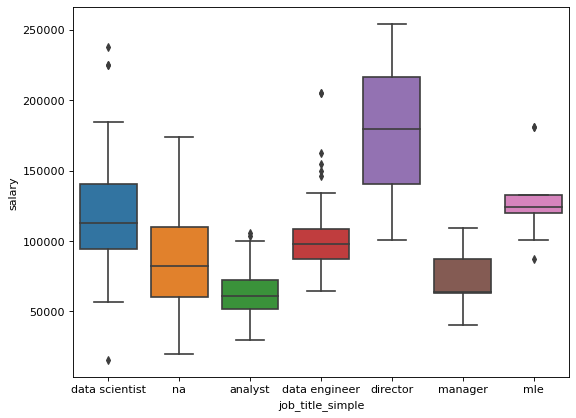

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x="job_title_simple",y="salary",data=data)

job title 7 unique values, we can convert that into dummy columns

In [10]:
data["Company Name"].nunique() # Too many companies

234

The number of unique companies is too many in a dataset that only has 370 rows. It means not most companies don't even have 2 jobs in this dataset. So we will drop this column!

In [11]:
data["Type of ownership"].nunique()

9

9 unique values we can work with. Let's convert Type ownership into dummy variables as well

In [12]:
data["job_state"].nunique()

37

Generating 37 dummy columns again is a bit much for this dataset. However, it is not as bad as the Company Name column and state might have important clues about the salary. So let's convert the job_state column by assigning each state a number.

Label encoding converts the categorical data into numerical ones, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues during model training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.

In [13]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode states in column 'job_state'. 
data['job_state']= label_encoder.fit_transform(data['job_state']) 

Let's convert the other two categorigal columns into dummy variables

In [14]:
data = pd.get_dummies(data, columns =["job_title_simple", "Type of ownership"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ID                                                370 non-null    float64
 1   Job Description                                   370 non-null    object 
 2   CompanyRating                                     370 non-null    float64
 3   Company Name                                      370 non-null    object 
 4   job_state                                         370 non-null    int64  
 5   python                                            370 non-null    float64
 6   r                                                 370 non-null    float64
 7   aws                                               370 non-null    float64
 8   excel                                             370 non-null    float64
 9   salary               

## Train Test Split

In [16]:
X = data.drop(["ID", "Job Description", "Company Name", "salary"], axis=1)
y= data["salary"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Algorithm Setup and Training

In [19]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR()

## Model Testing and Evaluation

In [20]:
predictions = model.predict(X_test)

In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 29887.184116696397
Mean Squared Error: 1245025814.2079716
Root Mean Squared Error: 35284.92332722252


Not the best model. RMSE is very close to the standard deviation of the salary column. This means our model works as well as if we were to use the average salary value as the prediction for any new job.

Let's see if we were able to improve with Grid Search!

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,  5000, 10000, 20000], 'gamma': ["auto","scale"],'kernel': ['linear','rbf']} 

In SVR, C controls the trade-off between the flatness of the regression function and the amount tolerated for deviations larger than the epsilon margin.

Small C value: A small C value allows for a larger margin of tolerance for deviations from the predicted values (i.e., larger ε-insensitive zone). This can lead to a simpler regression function that may generalize better to new data but might underfit the training data.

Large C value: A large C value imposes a higher penalty on deviations outside the ε-insensitive zone, leading to a smaller margin of tolerance. This can result in a more complex regression function that fits the training data well but might overfit and perform poorly on new data.

In SVR, the C parameter helps to balance the trade-off between the complexity of the regression function (fitting the training data well) and its generalization ability (performing well on new data). 

In [23]:
grid = GridSearchCV(SVR(),param_grid,verbose=3)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .C=0.1, gamma=auto, kernel=linear;, score=-0.026 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=auto, kernel=linear;, score=-0.007 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=auto, kernel=linear;, score=-0.042 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=auto, kernel=linear;, score=-0.036 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=auto, kernel=linear;, score=-0.059 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.043 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=rbf;, score=-0.060 total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.026 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=linear;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000, 10000, 20000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 20000, 'gamma': 'auto', 'kernel': 'rbf'}

In [26]:
grid.best_estimator_

SVR(C=20000, gamma='auto')

In [27]:
grid_predictions = grid.predict(X_test)

In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 20544.322007435196
Mean Squared Error: 653225493.735693
Root Mean Squared Error: 25558.276423415038


The error reduced a bit but still not the best model out there!